In [92]:
#Import common modules
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

In [93]:
path = 'Data sets/fashion-waste.csv'
data = pd.read_csv(path, index_col=None)
data.head()

,Metric,Company,Year,Value,Source Page
0,Global Reporting Initiative+Hazardous Waste Re...,Inditex,2023,34.488,https://wikirate.org/~18085986
1,Global Reporting Initiative+Hazardous Waste Re...,H&M,2023,Unknown,https://wikirate.org/~19244996
2,Global Reporting Initiative+Hazardous Waste Re...,Nike Inc.,2023,Unknown,https://wikirate.org/~18082680
3,Global Reporting Initiative+Hazardous Waste Re...,Adidas AG,2023,Unknown,https://wikirate.org/~18074968
4,Global Reporting Initiative+Hazardous Waste Re...,Prada,2023,1,https://wikirate.org/~19859227


In [94]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Metric       297 non-null    object
 1   Company      297 non-null    object
 2   Year         297 non-null    int64 
 3   Value        297 non-null    object
 4   Source Page  247 non-null    object
dtypes: int64(1), object(4)
memory usage: 11.7+ KB


In [95]:
data['Company'].unique()

array(['Inditex', 'H&M', 'Nike Inc.', 'Adidas AG', 'Prada', 'Asos',
       'Gap inc.', 'Louis Vuitton Malletier SA (LVMH)'], dtype=object)

Brands we consider: Inditex, H&M, Nike Inc., Adidas AG, Prada, Asos, Gap inc., Louis Vuitton Malletier SA (LVMH)

In [97]:
data['Value'].unique()

array(['34.488', 'Unknown', '1', '51.648', '14509', '33', '21606',
       '236984', '26382', '2275', '21554.360', '2242', '69350', '1444',
       '19685.985', '1443', '1236.723', '4650', '220',
       'Wages & Financial Benefits (e.g. bonuses/insurance/social security/pensions), Energy & Carbon Emissions, Living Conditions/Dormitories, Annual Leave & Public Holidays, Water Usage & Footprint, Contracts & Terms of Employment, Foreign & Migrant Labour, Maternity Rights & Parental Leave, Anti-bribery Corruption & Presentation of False Information, Water Effluents & Treatment, Sub-contracting (2021 only), Discrimination, Working Hours & Rest Breaks, Harassment & Violence, Health & Safety, Child Labour, Waste & Recycling (Packaging/Office/Facility), Forced & Bonded Labour, Freedom of Association Right to Organise & Collective Bargaining, Equal Pay',
       'Wages & Financial Benefits (e.g. bonuses/insurance/social security/pensions), Energy & Carbon Emissions, Homeworking (2021 only), Living

In [98]:
df = data.copy()
# Replace 'Unknown' with NaN
df.replace('Unknown', np.nan, inplace=True)

#we can also drop source page in the copied dataframe 


# Verify changes
print(df.isnull().sum())

Metric          0
Company         0
Year            0
Value          82
Source Page    50
dtype: int64


In [99]:
df.head()

,Metric,Company,Year,Value,Source Page
0,Global Reporting Initiative+Hazardous Waste Re...,Inditex,2023,34.488,https://wikirate.org/~18085986
1,Global Reporting Initiative+Hazardous Waste Re...,H&M,2023,NaN,https://wikirate.org/~19244996
2,Global Reporting Initiative+Hazardous Waste Re...,Nike Inc.,2023,NaN,https://wikirate.org/~18082680
3,Global Reporting Initiative+Hazardous Waste Re...,Adidas AG,2023,NaN,https://wikirate.org/~18074968
4,Global Reporting Initiative+Hazardous Waste Re...,Prada,2023,1,https://wikirate.org/~19859227


In [100]:
#How to treat 'Value' if it has numeric and descriptive values?

In [101]:
data['Metric'].unique()

array(['Global Reporting Initiative+Hazardous Waste Recycled, GRI 306-2-a (formerly G4-EN23-a)',
       'Global Reporting Initiative+Hazardous Waste Created, GRI 306-2 (formerly G4-EN23-a)',
       'Global Reporting Initiative+Total Waste Generated, GRI 306-2 (formerly G4-EN23-a)',
       'Global Reporting Initiative+Non-Hazardous Waste, GRI 306-2 (formerly G4-EN23-a)',
       'Global Reporting Initiative+Total Waste Recycled, GRI 306-2 (formerly G4-EN23-a)',
       'Global Reporting Initiative+Non-Hazardous Waste Recycled, GRI 306-2 (formerly G4-EN23-a)',
       'Global Reporting Initiative+Total Waste to Landfill, GRI 306-2 (formerly G4-EN23-a)',
       'Fashion Revolution+Supply Chain Policies',
       'Fashion Revolution+1.3 Management Procedures',
       'Fashion Revolution+1.1 Own Operations Policies',
       'Wikirate SDG Metric design+Percentage of waste recycled',
       'Wikirate SDG Metric design+Percentage hazardous waste recycled',
       'Wikirate SDG Metric design+Percen

In [102]:
#How to create a new column 'Researching Body' by extracting it from 'Metric' and using '+' as a cutting point?

# Create a new column 'Researching Body' by extracting the part before '+'
df['Researching Body']=df['Metric'].str.split('+').str[0]

df['Metric']=df['Metric'].str.split('+').str[1]

# Verify the new column
df.head()

,Metric,Company,Year,Value,Source Page,Researching Body
0,"Hazardous Waste Recycled, GRI 306-2-a (formerl...",Inditex,2023,34.488,https://wikirate.org/~18085986,Global Reporting Initiative
1,"Hazardous Waste Recycled, GRI 306-2-a (formerl...",H&M,2023,NaN,https://wikirate.org/~19244996,Global Reporting Initiative
2,"Hazardous Waste Recycled, GRI 306-2-a (formerl...",Nike Inc.,2023,NaN,https://wikirate.org/~18082680,Global Reporting Initiative
3,"Hazardous Waste Recycled, GRI 306-2-a (formerl...",Adidas AG,2023,NaN,https://wikirate.org/~18074968,Global Reporting Initiative
4,"Hazardous Waste Recycled, GRI 306-2-a (formerl...",Prada,2023,1,https://wikirate.org/~19859227,Global Reporting Initiative


In [103]:
#now, let's split the first column with ','
df['Metric']=df['Metric'].str.split(',').str[0]

df.head(20)

,Metric,Company,Year,Value,Source Page,Researching Body
0,Hazardous Waste Recycled,Inditex,2023,34.488,https://wikirate.org/~18085986,Global Reporting Initiative
1,Hazardous Waste Recycled,H&M,2023,NaN,https://wikirate.org/~19244996,Global Reporting Initiative
2,Hazardous Waste Recycled,Nike Inc.,2023,NaN,https://wikirate.org/~18082680,Global Reporting Initiative
3,Hazardous Waste Recycled,Adidas AG,2023,NaN,https://wikirate.org/~18074968,Global Reporting Initiative
4,Hazardous Waste Recycled,Prada,2023,1,https://wikirate.org/~19859227,Global Reporting Initiative
5,Hazardous Waste Recycled,Asos,2023,NaN,https://wikirate.org/~18087425,Global Reporting Initiative
6,Hazardous Waste Created,Inditex,2023,51.648,https://wikirate.org/~18085986,Global Reporting Initiative
7,Hazardous Waste Created,H&M,2023,NaN,https://wikirate.org/~19244996,Global Reporting Initiative
8,Hazardous Waste Created,Nike Inc.,2023,14509,https://wikirate.org/~18082680,Global Reporting Initiative
9,Hazardous Waste Created,Adidas AG,2023,NaN,https://wikirate.org/~18074968,Global Reporting Initiative


In [104]:
data['Metric'].unique()
#why is there still the first part?

array(['Global Reporting Initiative+Hazardous Waste Recycled, GRI 306-2-a (formerly G4-EN23-a)',
       'Global Reporting Initiative+Hazardous Waste Created, GRI 306-2 (formerly G4-EN23-a)',
       'Global Reporting Initiative+Total Waste Generated, GRI 306-2 (formerly G4-EN23-a)',
       'Global Reporting Initiative+Non-Hazardous Waste, GRI 306-2 (formerly G4-EN23-a)',
       'Global Reporting Initiative+Total Waste Recycled, GRI 306-2 (formerly G4-EN23-a)',
       'Global Reporting Initiative+Non-Hazardous Waste Recycled, GRI 306-2 (formerly G4-EN23-a)',
       'Global Reporting Initiative+Total Waste to Landfill, GRI 306-2 (formerly G4-EN23-a)',
       'Fashion Revolution+Supply Chain Policies',
       'Fashion Revolution+1.3 Management Procedures',
       'Fashion Revolution+1.1 Own Operations Policies',
       'Wikirate SDG Metric design+Percentage of waste recycled',
       'Wikirate SDG Metric design+Percentage hazardous waste recycled',
       'Wikirate SDG Metric design+Percen

Let's look at Inditex. They produced 621,244 tonnes of garments in 2022.
Adidas: 1,018,000,000 items across footwear, apparel, gear and accessories in 2022

In [106]:
df.isnull().sum()

Metric               0
Company              0
Year                 0
Value               82
Source Page         50
Researching Body     0
dtype: int64

In [107]:
print(df[df['Metric'].str.contains('Plastic')])

                                                Metric    Company  Year Value  \
262  NAT.B12.EA Plastic Use and Waste Reduction Qua...   Gap inc.  2022   Yes   
263  NAT.B12.EA Plastic Use and Waste Reduction Qua...  Nike Inc.  2022   Yes   
264  NAT.B12.EA Plastic Use and Waste Reduction Qua...  Adidas AG  2022   Yes   
265  NAT.B12.EA Plastic Use and Waste Reduction Qua...      Prada  2022   Yes   
266  NAT.B12.EA Plastic Use and Waste Reduction Qua...       Asos  2022    No   
267  NAT.B12.EB Plastic Use and Waste Reduction Qua...   Gap inc.  2022   Yes   
268  NAT.B12.EB Plastic Use and Waste Reduction Qua...  Nike Inc.  2022    No   
269  NAT.B12.EB Plastic Use and Waste Reduction Qua...  Adidas AG  2022    No   
270  NAT.B12.EB Plastic Use and Waste Reduction Qua...      Prada  2022    No   
271  NAT.B12.EB Plastic Use and Waste Reduction Qua...       Asos  2022    No   
272  NAT.B12.EC Plastic Use and Waste Reduction Tar...   Gap inc.  2022    No   
273  NAT.B12.EC Plastic Use 

In [108]:
df = df.drop('Source Page', axis=1)

In [109]:
df.tail()

,Metric,Company,Year,Value,Researching Body
292,NAT.B12.EG Plastic Use and Waste Reduction Evi...,Gap inc.,2022,Yes,World Benchmarking Alliance
293,NAT.B12.EG Plastic Use and Waste Reduction Evi...,Nike Inc.,2022,Yes,World Benchmarking Alliance
294,NAT.B12.EG Plastic Use and Waste Reduction Evi...,Adidas AG,2022,No,World Benchmarking Alliance
295,NAT.B12.EG Plastic Use and Waste Reduction Evi...,Prada,2022,No,World Benchmarking Alliance
296,NAT.B12.EG Plastic Use and Waste Reduction Evi...,Asos,2022,No,World Benchmarking Alliance


In [110]:
data['Value'].unique()

array(['34.488', 'Unknown', '1', '51.648', '14509', '33', '21606',
       '236984', '26382', '2275', '21554.360', '2242', '69350', '1444',
       '19685.985', '1443', '1236.723', '4650', '220',
       'Wages & Financial Benefits (e.g. bonuses/insurance/social security/pensions), Energy & Carbon Emissions, Living Conditions/Dormitories, Annual Leave & Public Holidays, Water Usage & Footprint, Contracts & Terms of Employment, Foreign & Migrant Labour, Maternity Rights & Parental Leave, Anti-bribery Corruption & Presentation of False Information, Water Effluents & Treatment, Sub-contracting (2021 only), Discrimination, Working Hours & Rest Breaks, Harassment & Violence, Health & Safety, Child Labour, Waste & Recycling (Packaging/Office/Facility), Forced & Bonded Labour, Freedom of Association Right to Organise & Collective Bargaining, Equal Pay',
       'Wages & Financial Benefits (e.g. bonuses/insurance/social security/pensions), Energy & Carbon Emissions, Homeworking (2021 only), Living

In [111]:
#let's start making subsets to visualise 
df.head(20)


,Metric,Company,Year,Value,Researching Body
0,Hazardous Waste Recycled,Inditex,2023,34.488,Global Reporting Initiative
1,Hazardous Waste Recycled,H&M,2023,NaN,Global Reporting Initiative
2,Hazardous Waste Recycled,Nike Inc.,2023,NaN,Global Reporting Initiative
3,Hazardous Waste Recycled,Adidas AG,2023,NaN,Global Reporting Initiative
4,Hazardous Waste Recycled,Prada,2023,1,Global Reporting Initiative
5,Hazardous Waste Recycled,Asos,2023,NaN,Global Reporting Initiative
6,Hazardous Waste Created,Inditex,2023,51.648,Global Reporting Initiative
7,Hazardous Waste Created,H&M,2023,NaN,Global Reporting Initiative
8,Hazardous Waste Created,Nike Inc.,2023,14509,Global Reporting Initiative
9,Hazardous Waste Created,Adidas AG,2023,NaN,Global Reporting Initiative


In [117]:
#82 no anwers our of 29

#a new table for total waste generated 2022 and 2023
#.groupby()

df.loc[(df['Company'])=='Asos']
#Asos has too many answers missing

,Metric,Company,Year,Value,Researching Body
5,Hazardous Waste Recycled,Asos,2023,NaN,Global Reporting Initiative
11,Hazardous Waste Created,Asos,2023,NaN,Global Reporting Initiative
17,Total Waste Generated,Asos,2023,NaN,Global Reporting Initiative
24,Non-Hazardous Waste,Asos,2023,NaN,Global Reporting Initiative
31,Total Waste Recycled,Asos,2023,NaN,Global Reporting Initiative
37,Non-Hazardous Waste Recycled,Asos,2023,NaN,Global Reporting Initiative
43,Total Waste to Landfill,Asos,2023,NaN,Global Reporting Initiative
50,Supply Chain Policies,Asos,2023,"Water Effluents & Treatment, Waste & Recycling...",Fashion Revolution
57,1.3 Management Procedures,Asos,2023,"Water Effluents & Treatment, Waste & Recycling...",Fashion Revolution
64,1.1 Own Operations Policies,Asos,2023,"Waste & Recycling (Product/Textiles), Animal W...",Fashion Revolution


In [123]:
df = df[df["Company"].str.contains("Asos") == False]
df.isnull().sum()

Metric               0
Company              0
Year                 0
Value               62
Researching Body     0
dtype: int64

In [165]:
#split 2022 and 2023
data_2022=df[df.Year==2022].copy()
data_2023=df[df.Year==2023].copy()

In [193]:
#would be handy to sort the metrics alphabetically

waste_2023=df.loc[(df['Metric']=='Total Waste Generated') & (df['Year']==2023)]
waste_2023['Value'] = pd.to_numeric(waste_2023['Value'], errors='coerce')
waste_2023=waste_2023.sort_values(by=['Value'], ascending=False)
waste_2023

,Metric,Company,Year,Value,Researching Body
14,Total Waste Generated,Nike Inc.,2023,236984.0,Global Reporting Initiative
15,Total Waste Generated,Adidas AG,2023,26382.0,Global Reporting Initiative
12,Total Waste Generated,Inditex,2023,21606.0,Global Reporting Initiative
16,Total Waste Generated,Prada,2023,2275.0,Global Reporting Initiative
13,Total Waste Generated,H&M,2023,NaN,Global Reporting Initiative


In [239]:
waste_2023.describe()

,Year,Value
count,5.0,4.000000
mean,2023.0,71811.750000
std,0.0,110606.978817
min,2023.0,2275.000000
25%,2023.0,16773.250000
50%,2023.0,23994.000000
75%,2023.0,79032.500000
max,2023.0,236984.000000


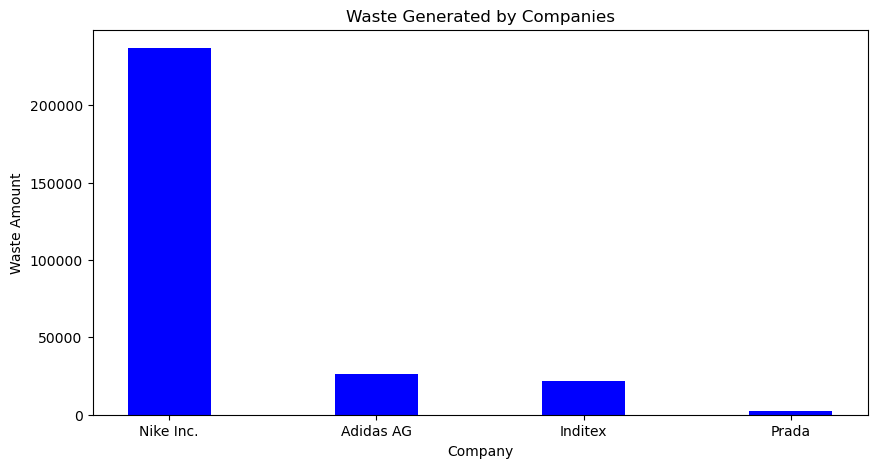

In [195]:
#now we want this as a graph + compare to average amount of waste 
company = list(waste_2023['Company'])
waste = list(waste_2023['Value'])
 
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(company, waste, color ='blue', 
        width = 0.4)

plt.xlabel("Company")
plt.ylabel("Waste Amount")
plt.title("Waste Generated by Companies")

plt.show()



In [304]:
#Now, let's try to compare against the average waste generated by any company in the field of 'retail'
path2 = 'Data sets/apparel-companies-waste.csv'
df2 = pd.read_csv(path2, index_col=None)


ParserError: Error tokenizing data. C error: Expected 1 fields in line 5, saw 6


In [ ]:
df2.replace('Unknown', np.nan, inplace=True)
df2['Value'] = pd.to_numeric(df2['Value'], errors='coerce')
df2

In [ ]:
df2=df2.sort_values(by=['Value'], ascending=False)
df2

In [ ]:
#I see we have different years. LEt's focus on 2023
overall_2023 = df2[df2.Year==2023].copy()
overall_2023

In [ ]:
df2.describe().T

In [ ]:
overall_2023.info()

In [ ]:
#YASSSS! Now we need the average amount
overall_2023.describe().T
#well, now we see that we don't need the year column at all 
overall_2023 = overall_2023.drop ('Year', axis=1)

In [ ]:
overall_2023.describe()

overall mean is 33 237 metric tonnes
while fashion mean is 71 811 metric tonnes. This is more than double

In [ ]:
overall_2023.sort_values(by=['Value'], ascending=False)

In [ ]:
waste_all.sort_values(by=['Value'], ascending=False)

In [ ]:
#let's make it more sophisticated:
# Ensure 'Year' is treated as numeric
df2['Year'] = pd.to_numeric(df2['Year'])

# Sort data by Company and Year in descending order
waste_all = df2.sort_values(by=['Company', 'Year'], ascending=[True, False])

# Drop duplicates to keep only the most recent year for each company
waste_all = waste_all.drop_duplicates(subset=['Company'], keep='first')

waste_all=waste_all.dropna()

waste_all

In [ ]:
waste_all.describe()

Okay, so our mean is for all retail companies is 69 539 metric tonnes while our fast fashion choices fashion mean is 71 811 metric tonnes. 

In [ ]:
Let's look at our winner, Nike Inc.
df[df.Company=='Nike Inc.']

In [ ]:
ladfill_waste_2023 = df.loc[(df.Metric=='Total Waste to Landfill') & (df['Year']==2023)] 
ladfill_waste_2023

In [ ]:
recycled_waste_2023 = df.loc[(df.Metric=='Total Waste Recycled') & (df['Year']==2023)] 
recycled_waste_2023

In [ ]:
#Okay, enough of this dataset. It won't get any further. Let's import the textile one.
path3 = 'Data sets/Plastic based Textiles in clothing industry.csv'
df3 = pd.read_csv(path3, index_col=None)
df3.head(20)

In [ ]:
df3.Company.unique()

In [ ]:
#We have Nike, Adidas and Zara to overlap. Let's look at them only?

In [ ]:
df3.Product_Type.unique()

In [ ]:
plastics= ('Polyester', 'Nylon', 'Recycled_Poly', 'Synthetic_Blend','Microfiber')